# US soils

The properties of a number of US soils has been published by Charberneau (2000) for the Brooks and Corey relations.

The tables with the soil data are imported and allow compuation of suction, moisture and hydraulic conductivity relations for the most important Dutch soils, the so-called Staringreeks. The Staring Series defines 18 upper soils and 18 lower soils.

@TO Aug. 2026

In [ ]:
import os
import numpy as np              # noqa
import matplotlib.pyplot as plt # noqa
from itertools import cycle     # noqa
import etc                      # noqa
from soils.src import US_soils as sUS
from pathlib import Path

wbook_folder = os.path.join(Path('__file__').resolve().parent.parent, "data")

# US soil properties

The properties, named here US soils are Charbeneau (2000), table 4.4.1. They were published by Carsel and Parrish (1988) reporting mean and standard deviatioin for the Brooks & Corey (abbr. BC) properties of a number of soil. The table in Charbeneau (2000) was in m and days, I converted them to cm/d to be consistent with the Van Genughten (abbr. vG or VG) parameters.

In [6]:
wbook = os.path.join(wbook_folder, 'US_BC_soilprops.xlsx')
sUS.Soil.load_soils(wbook) # load once
sUS.Soil.pretty_data()
sand4 = sUS.Soil("US04")
sand9  = sUS.Soil("US09")

     Main cat     Soil Texture      Ks  sigma_Ks  theta_s  sigma_theta_s  theta_r  sigma_theta_r  psi_b  sigma_psi_b  lambda  sigma_lambda
code                                                                                                                                      
US01     Clay             Clay    4.80      10.0     0.38           0.09    0.068          0.034  125.0        188.0    0.09          0.09
US02     Loam        Clay loam    6.20      17.0     0.41           0.09    0.095          0.010   53.0         42.0    0.31          0.09
US03     Loam             Loam   25.00      44.0     0.43           0.10    0.078          0.013   28.0         16.0    0.56          0.11
US04     Sand       Loamy sand  350.00     270.0     0.41           0.09    0.057          0.015    8.1          2.8    1.28          0.27
US05     Silt             Silt    6.00       7.9     0.46           0.11    0.034          0.010   62.0         27.0    0.37          0.05
US06     Loam       Silty l

# The Brooks & Corey parameters of the US soils

The series of 12 US soils in table 4.4.1 of Charbeneau (2000) (first published by Carsel and Parrish (1988)) are presented by their BC parameters. These parameters Ks, theta_s, theta_r and lambda are shown next.

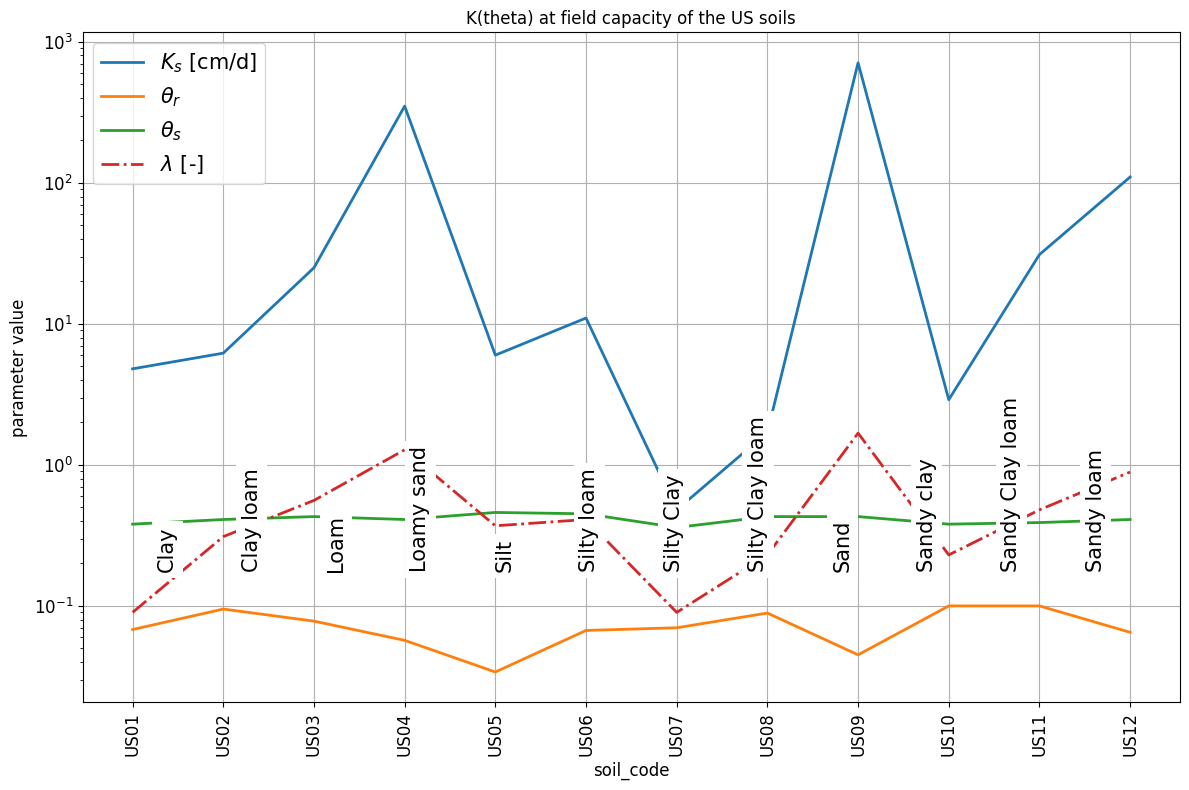

In [7]:
# %% Soil parameters

title = 'K(theta) at field capacity of the US soils'
ax = etc.newfig(title, 'soil_code', 'parameter value', yscale='log')

soil_codes = sUS.Soil.data.index

idx = soil_codes
ax.plot(idx, sUS.Soil.data.loc[soil_codes, 'Ks'], lw=2, label=r'$K_s$ [cm/d]')
ax.plot(idx, sUS.Soil.data.loc[soil_codes, 'theta_r'], lw=2, label=r'$\theta_r$')
ax.plot(idx, sUS.Soil.data.loc[soil_codes, 'theta_s'], lw=2, label=r'$\theta_s$')        
ax.plot(idx, sUS.Soil.data.loc[soil_codes, 'lambda'], '-.', lw=2, label=r'$\lambda$ [-]')

for i, code in enumerate(soil_codes):
        soil = sUS.Soil(code)

        ax.text((i + 1) / (len(soil_codes) + 1), 0.2,
        soil.props['Soil Texture'], ha='center', rotation=90, fontsize=15, zorder=5,
        bbox=dict(facecolor='white',
                alpha=1,
                edgecolor='none'),
        transform=ax.transAxes)

ax.legend(fontsize=15, loc='upper left')

#ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.xticks(rotation=90, ha="center")
plt.tight_layout()


# Show field capacities and wilting point for all Dutch soils (Ondergronden and Bovengronden)

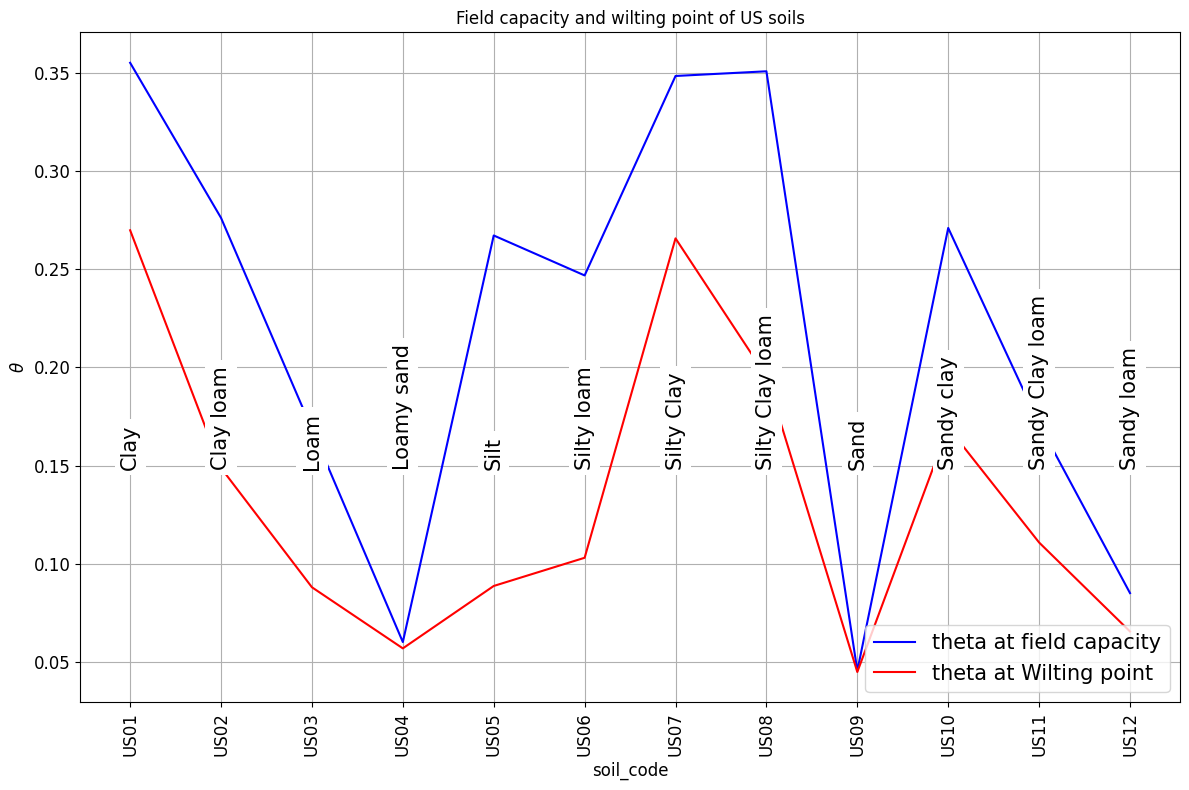

In [5]:
# %% Show field capacities and wilting points

title = 'Field capacity and wilting point of US soils'
ax = etc.newfig(title, 'soil_code', r'$\theta$')

fcs, wps, codes = [], [], []
for code in sUS.Soil.data.index:
    soil = sUS.Soil(code)
    codes.append(code)
    fcs.append(soil.theta_fc(pF=2.5))
    wps.append(soil.theta_wp(pF=4.2))
    
    i = int(code[-2:])
    ax.text(int(code[-2:]) - 1, 0.15,
            soil.props['Soil Texture'], ha='center', rotation=90, fontsize=15, zorder=5,
            bbox=dict(facecolor='white',
                    alpha=1,
                    edgecolor='none'))

ax.plot(codes, np.array(fcs), 'b', label='theta at field capacity')
ax.plot(codes, np.array(wps), 'r', label='theta at Wilting point')
ax.legend(fontsize=15, loc='lower right')

#ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.xticks(rotation=90, ha="center")
plt.tight_layout()

# Show $K(\theta)$ at field capacity (pF = 2.5)

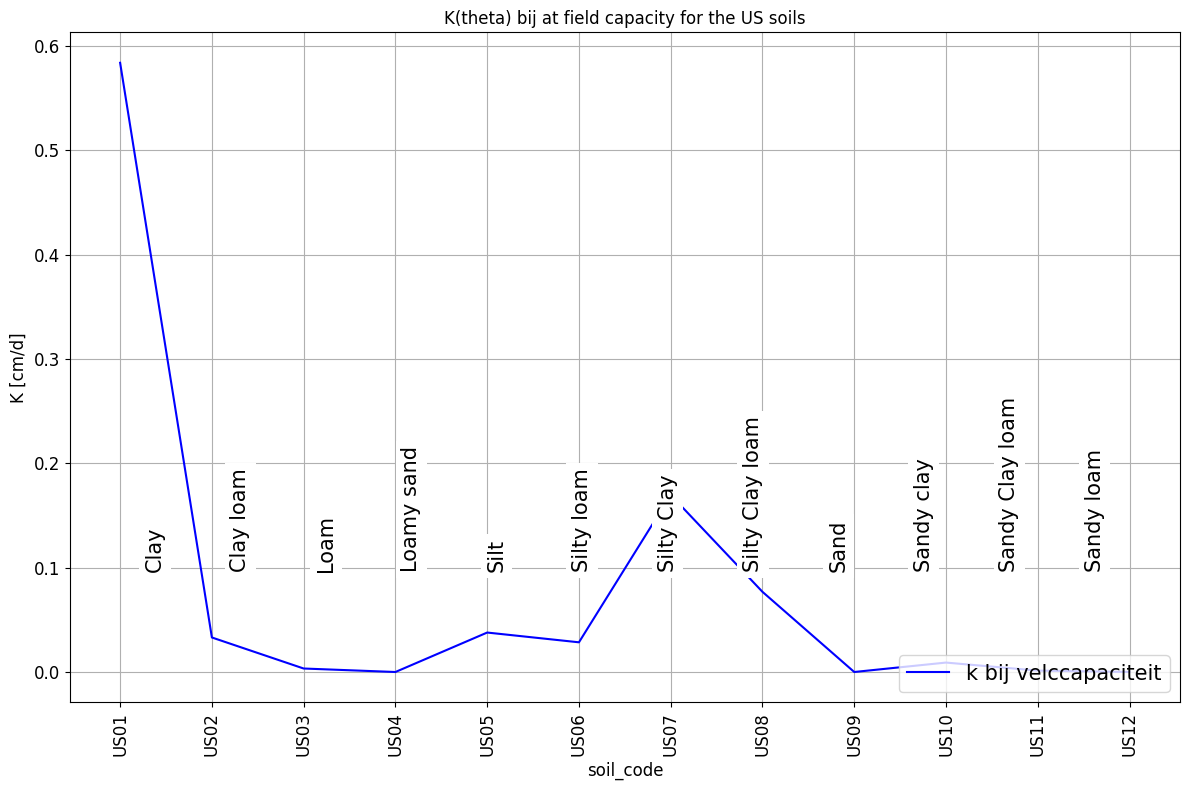

In [6]:
# %% K(theta) bij veldcapaciteit (pF=2.5)


title = 'K(theta) bij at field capacity for the US soils'
ax = etc.newfig(title, 'soil_code', 'K [cm/d]')

soil_codes = sUS.Soil.data.index

kvalues, codes = [], []

for i, code in enumerate(soil_codes):
        soil = sUS.Soil(code)
        codes.append(code)
        kvalues.append(soil.K_fr_theta(soil.theta_fc(pF=2.5)))
                
        ax.text((i + 1) / (len(soil_codes) + 1), 0.2,
        soil.props['Soil Texture'], ha='center', rotation=90, fontsize=15, zorder=5,
        bbox=dict(facecolor='white',
                alpha=1,
                edgecolor='none'),
        transform=ax.transAxes)


ax.plot(codes, np.array(kvalues), 'b', label='k bij velccapaciteit')    
ax.legend(fontsize=15, loc='lower right')

#ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.xticks(rotation=90, ha="center")
plt.tight_layout()

# Showing the $\psi(\theta)$ relation for all soils, each with its field capacity and wilting point.

$\psi(\theta)$ is verified by also showing (as dots) $\psi(\theta(\psi))$, which must give the same points if $\\psi(\theta)$ and $\theta(\psi)$ have been correctly implemented.

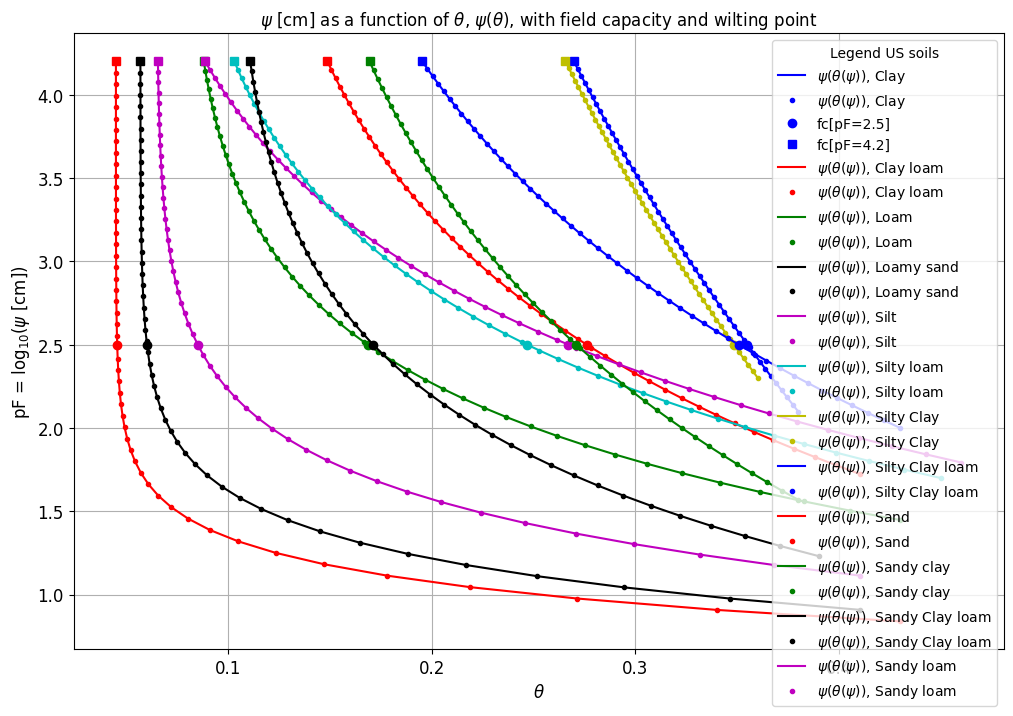

In [7]:
# %% psi(theta)
title = r"$\psi$ [cm] as a function of $\theta$, $\psi(\theta)$, with field capacity and wilting point"
ax=etc.newfig(title, r'$\theta$', r'pF = log$_{10}(\psi$ [cm])', yscale='linear')
    
clrs = cycle("brgkmcy")
for code in soil_codes:
    clr = next(clrs)
    soil = sUS.Soil(code)    
    psi = soil.psispace()
    theta = soil.theta_fr_psi(psi)
    soil_nm = soil.props['Soil Texture']
    
    
    pF  = np.log10(psi)
    pF1 = np.log10(soil.psi_fr_theta(theta))
    ax.plot(theta, pF,  '-', color=clr, label=fr"$\psi(\theta(\psi))$, {soil_nm}")
    ax.plot(theta, pF1, '.', color=clr, label=fr"$\psi(\theta(\psi))$, {soil_nm}")
    
    # Field capacity and wilting point
    pF_fc, pF_wp = 2.5, 4.2
    lbl1 = f"fc[pF={pF_fc}]" if code.endswith('01') else ""
    lbl2 = f"fc[pF={pF_wp}]" if code.endswith('01') else ""
    
    # Plot field_capacity and wilting_point
    ax.plot(soil.theta_fc(pF=pF_fc), pF_fc, 'o', color=clr, label=lbl1)
    ax.plot(soil.theta_wp(pF=pF_wp), pF_wp, 's', color=clr, label=lbl2)
    
ax.legend(title="Legend US soils")



# Show the moisture capacity $d\theta / d\psi$ for all selected soils.

dpsi_dtheta * dtheta_dpsisoil_nm, Clay
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1.]
dpsi_dtheta * dtheta_dpsisoil_nm, Clay loam
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1.]
dpsi_dtheta * dtheta_dpsisoil_nm, Loam
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1.]
dpsi_dtheta * dtheta_dpsisoil_nm, Loamy sand
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1.]
dpsi_dtheta * dtheta_dpsisoil_nm, Silt
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1.]
dpsi_dtheta * dthet

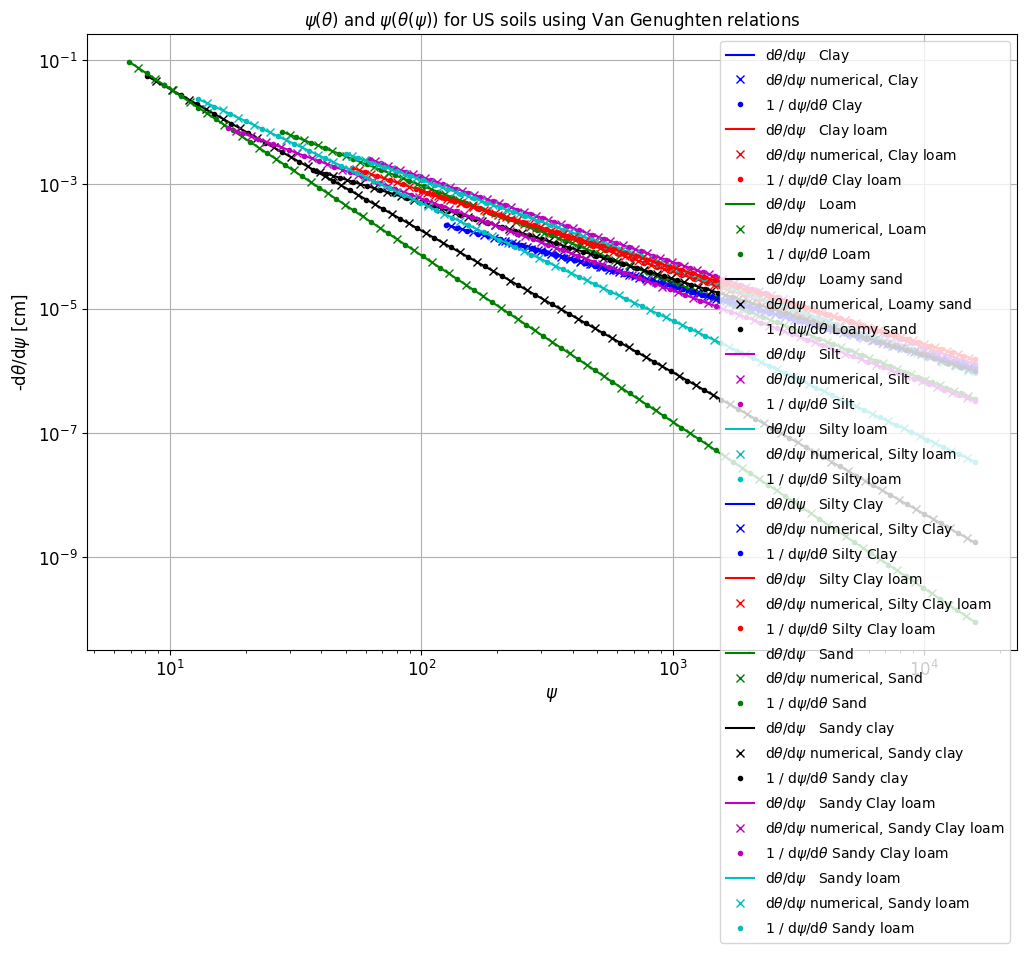

In [8]:
# %% Show dtheta/dpsi for all sands.

title = r"$\psi(\theta)$ and $\psi(\theta(\psi))$ for US soils using Van Genughten relations"
ax = etc.newfig(title, r'$\psi$', r'-d$\theta$/d$\psi$ [cm]',
                xscale='log', yscale='log')    
    
clrs = cycle('brgkmc')
for soil_code in soil_codes:
    soil = sUS.Soil(soil_code)
    soil_nm = soil.props['Soil Texture']
    psi = soil.psispace(50)
    theta = soil.theta_fr_psi(psi)     
    clr = next(clrs)
    ax.plot(psi, -soil.dtheta_dpsi(psi), '-', color=clr, label=fr'd$\theta$/d$\psi$   {soil_nm}')
    
    # Numeric approximation
    dtheta_dpsi = np.diff(theta) / np.diff(psi)
    psi_mid = 0.5 * (psi[1:] + psi[:-1])
    ax.plot(psi_mid, -dtheta_dpsi,'x', color=clr, label=fr'd$\theta$/d$\psi$ numerical, {soil_nm}')
    
    ax.plot(psi, -1 / soil.dpsi_dtheta(theta),'.', color=clr, label=fr'1 / d$\psi$/d$\theta$ {soil_nm}')

    print(f"dpsi_dtheta * dtheta_dpsisoil_nm, {soil_nm}\n",
          soil.dpsi_dtheta(theta) * soil.dtheta_dpsi(psi))

ax.legend(loc='upper right')

# Check that $S$ can be computed equally well from $\psi$ as from $\theta$

Comppute $S(\psi)$ from $\psi$

$$ S\left(\psi\right)=\left(1+\left(\alpha\psi\right)^{n}\right)^{-m} $$

Compute $S(\theta)$ from $\theta(\psi)$

$$ S\left(\theta\right)=\left(1+\left(\alpha\psi(\theta)\right)^{n}\right)^{-m} $$

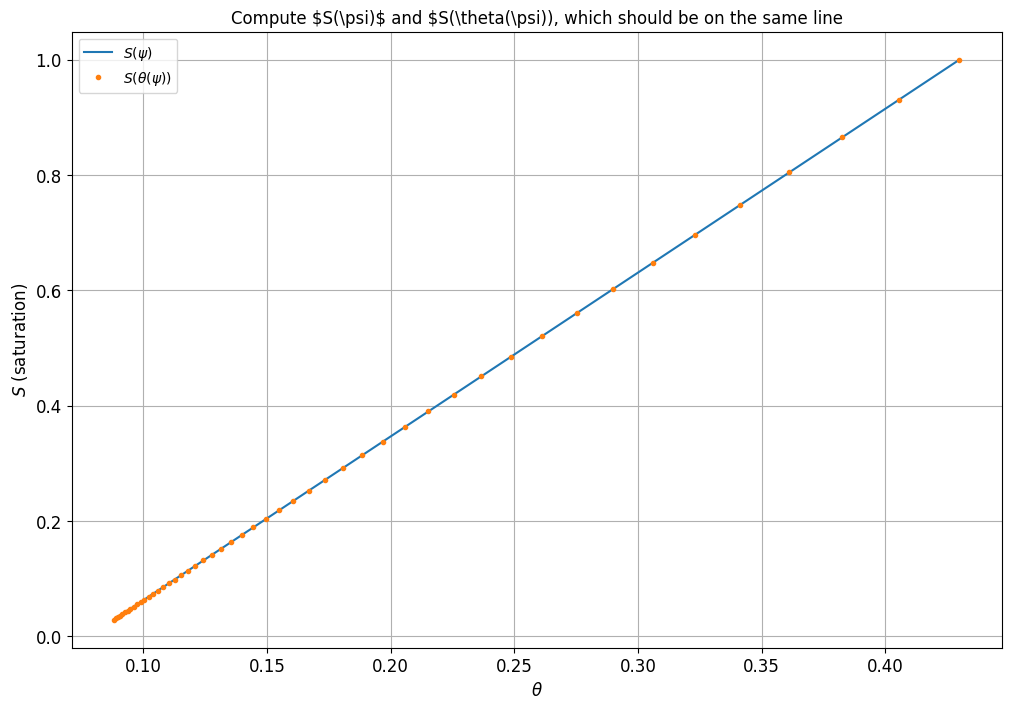

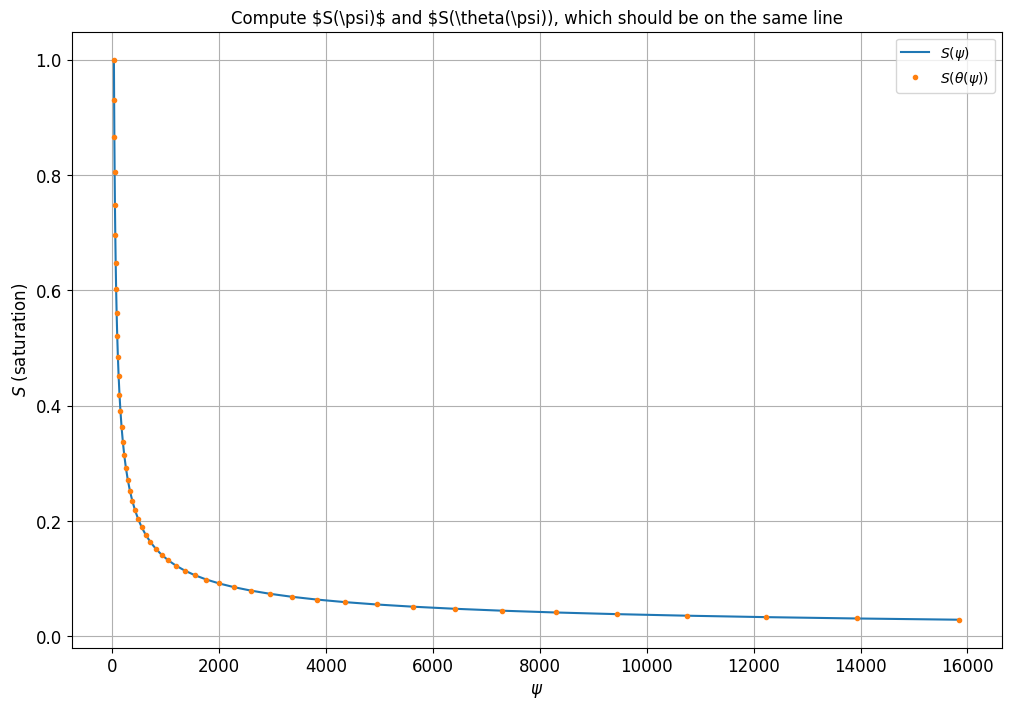

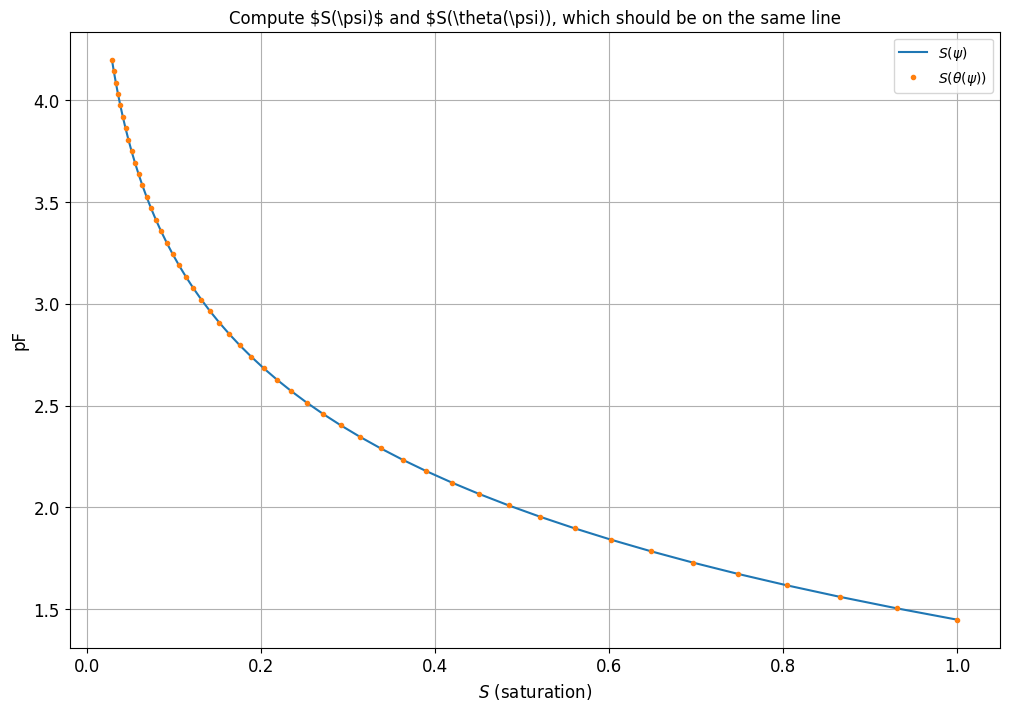

In [9]:
soil=sUS.Soil('US03')
psi   = soil.psispace(50)
theta = soil.theta_fr_psi(psi)

S_psi   = soil.S_fr_psi(psi)
S_theta = soil.S_fr_theta(theta)

title = r'Compute $S(\psi)$ and $S(\theta(\psi)), which should be on the same line'
ax = etc.newfig(title, r'$\theta$', r'$S$ (saturation)')

ax.plot(theta, S_psi,   '-', label=r'$S(\psi)$')
ax.plot(theta, S_theta, '.', label=r'$S(\theta(\psi))$')

ax.legend(loc='upper left')

title = r'Compute $S(\psi)$ and $S(\theta(\psi)), which should be on the same line'
ax = etc.newfig(title, r'$\psi$', r'$S$ (saturation)')

ax.plot(psi, S_psi,   '-', label=r'$S(\psi)$')
ax.plot(psi, S_theta, '.', label=r'$S(\theta(\psi))$')

ax.legend(loc='upper right')


title = r'Compute $S(\psi)$ and $S(\theta(\psi)), which should be on the same line'
ax = etc.newfig(title, r'$S$ (saturation)', r'pF')

pF = np.log10(psi)
ax.plot(S_psi,   pF, '-', label=r'$S(\psi)$')
ax.plot(S_theta, pF, '.', label=r'$S(\theta(\psi))$')

ax.legend(loc='upper right')

# Checking that $dS/d\psi \times d\psi/dS = 1$

There was a bug in the module. This is the test. The code computes both explicitly. After which the values are compared with the results from the module/class Soil(SoilBase(ABC))

In [10]:
soil = sUS.Soil('US03')

psi = soil.psispace()
S = soil.S_fr_psi(psi)

print(soil.dS_dpsi(psi) * soil.dpsi_dS(S))


[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1.]


# Show $d\psi/dS \times dS/d\theta$ and $d\psi/d\theta$

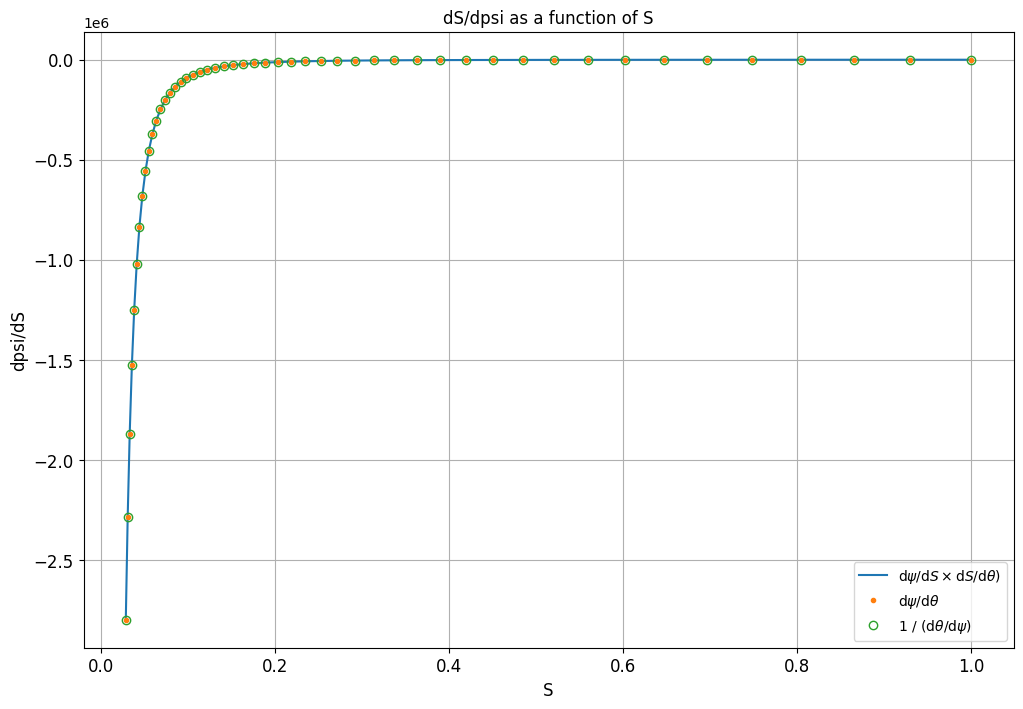

In [11]:
#soil.dpsi_dtheta(theta) * soil.dtheta_dpsi(psi)
psi = soil.psispace(50)
S   = soil.S_fr_psi(psi)

title = "dS/dpsi as a function of S"
ax = etc.newfig(title, 'S', 'dpsi/dS')

ax.plot(S, soil.dpsi_dS(S) * soil.dS_dtheta(theta), '-', label=r'd$\psi$/d$S \times $d$S$/d$\theta$)')
ax.plot(S, soil.dpsi_dtheta(theta), '.', label=r'd$\psi$/d$\theta$')
ax.plot(S, 1 / soil.dtheta_dpsi(psi), 'o', mfc='none', label=r'1 / (d$\theta$/d$\psi$)')


ax.legend()

# $K(\theta)$ and $dK/d\theta$

Below the hydraulic conductivity $K(\theta)$ vs $\theta$ and $dK(\thetea)/d\theta$is shown for all Dutch soils.

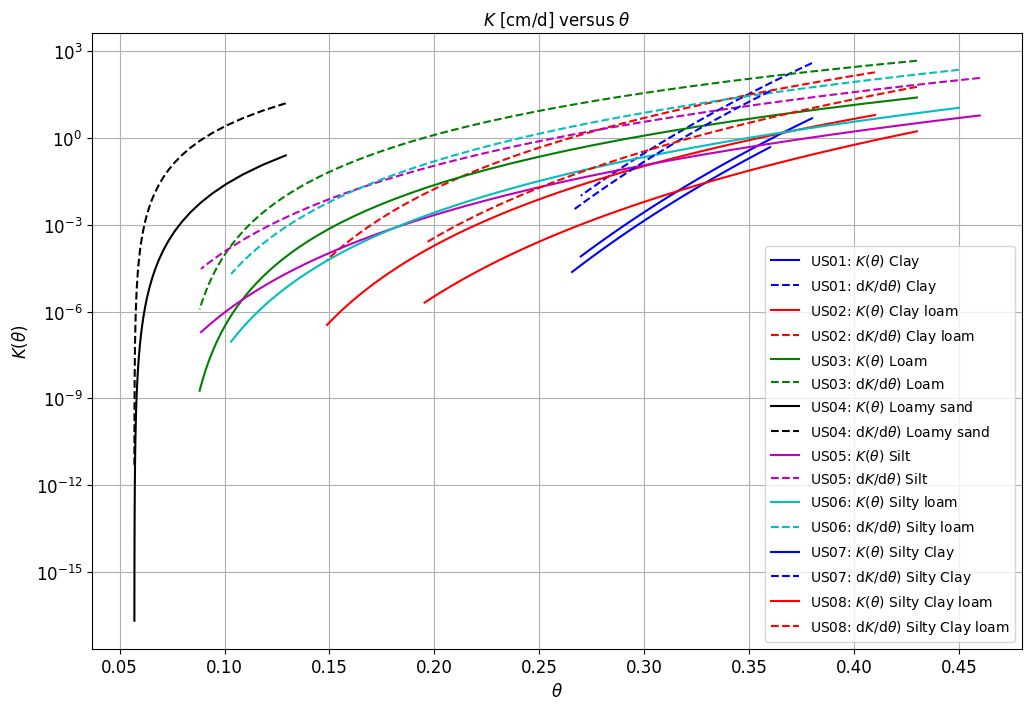

In [12]:
# %% K(theta) and dK/dtheta

psi = soil.psispace(50)

clrs = cycle('brgkmc')

title=r"$K$ [cm/d] versus $\theta$"
ax = etc.newfig(title, r'$\theta$', r'$K(\theta)$',
            yscale='log') #, ylim=(1e-7, 1e0))

soil_codes = sUS.Soil.data.index

for i, code in enumerate(soil_codes):
    if i == 8:
        break
    clr = next(clrs)
    soil = sUS.Soil(code)
    soil_nm = soil.props['Soil Texture']
    theta = soil.theta_fr_psi(psi)
    ax.plot(theta, soil.K_fr_theta(theta), '-', color=clr, label=fr"{code}: $K(\theta)$ {soil_nm}")
    ax.plot(theta, soil.dK_dtheta(theta), '--', color=clr, label=fr"{code}: d$K$/d$\theta)$ {soil_nm}")
ax.legend(loc='lower right')

# Show throttle functions

Throttle functions can be used by the a root zone model to reduces effective ET when the root zone dries out.

Four functions can be used:

* According to Feddes (not smooth)
* A smooth function, essentially the same as Feddes, but differentiable
* A k-based function according to Mualem. (Declines too fast)
* A blend function between Feddes and Mualem.

All four function also reduce ET when the soil becomes too wet (psi < 25 cm)

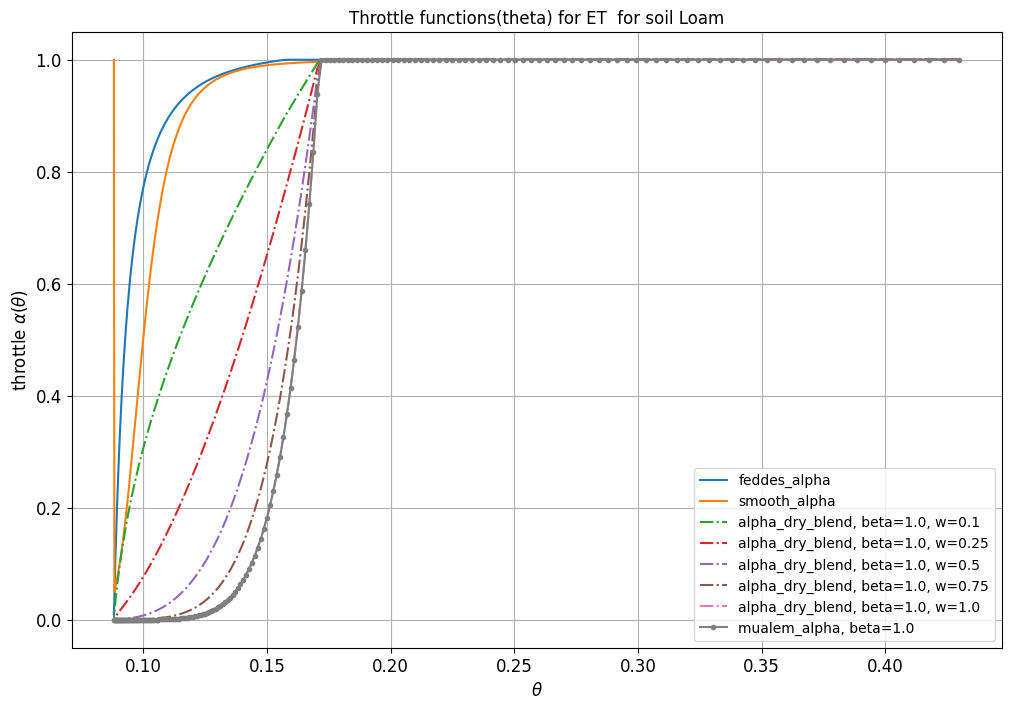

In [13]:
# %% Show the throttle function to throttle ET depending on theta
soil = sUS.Soil('US03') # sand

title = f"Throttle functions(theta) for ET  for soil {soil.props['Soil Texture']}"
ax = etc.newfig(title, r"$\theta$", r"throttle $\alpha(\theta)$")

psi = soil.psispace(200)
theta = soil.theta_fr_psi(psi)

# ax.plot(theta, soil.alpha_wet(theta), label=r'alpha_wett')
ax.plot(theta, soil.feddes_alpha(theta), label='feddes_alpha')
ax.plot(theta, soil.smooth_alpha(theta), label='smooth_alpha')
beta = 1.0
for w in [0.1, 0.25, 0.5, 0.75, 1.0]:
    ax.plot(theta, soil.alpha_dry_blend(theta, beta=beta, w=w), '-.',
        label=f'alpha_dry_blend, beta={beta}, w={w}')
for beta in [1.0]:
        ax.plot(theta, soil.mualem_alpha(theta, beta=beta), '.-', label=f'mualem_alpha, beta={beta}')
ax.legend()
plt.show()

# Impulse resonses IR and IR_PIII

* The IR is the analytic impulse response.
* The IR_PIII the Pearson III impulse response (method of moments)

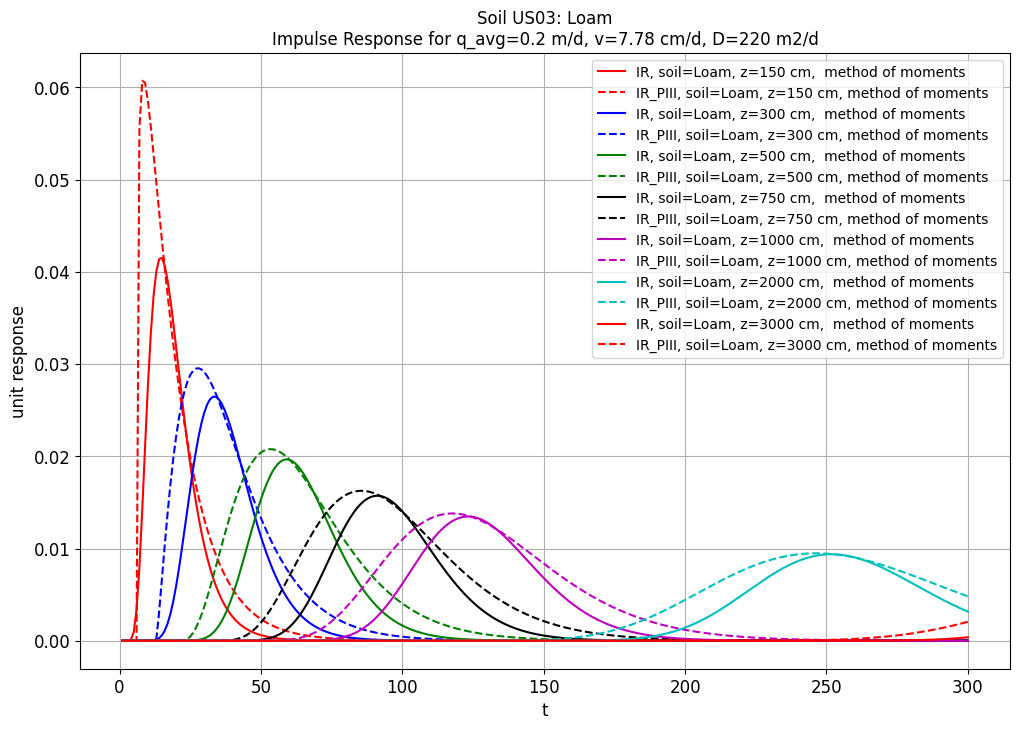

In [14]:
# %% Show the analytic IR

q_avg = .2 # cm/d
t = np.linspace(0, 300, 301)[1:]

soil = sUS.Soil("US03")  # Sand
soil_nm = soil.props['Soil Texture']
v, D = soil.get_vD(q_avg)

ttl = f"Soil {soil.code}: {soil_nm}\n"
title = ttl + f"Impulse Response for q_avg={q_avg:.3g} m/d, v={v:.3g} cm/d, D={D:.3g} m2/d"
ax = etc.newfig(title, 't', 'unit response')

clrs = cycle('rbgkmc')
for z in [150, 300, 500, 750, 1000, 2000, 3000]: # z in cm
    clr = next(clrs)
    ax.plot(t, soil.IR(z, t, q_avg), '-', color=clr, label=f'IR, soil={soil_nm}, z={z:.0f} cm,  method of moments')
    ax.plot(t, soil.IR_PIII(z, t, q_avg), '--', color=clr, label=f'IR_PIII, soil={soil_nm}, z={z:.0f} cm, method of moments')
ax.legend(loc='best')
# plt.show()


# Step resonses SR_phi, SR_erfc, SR_PIII

* SR_phi is exact solution using cumulative normal distributions
* SR_erfc is exact solution using erfc and exp functions
* SR_PIII is integration of the Pearson III impulse response (method of moments)

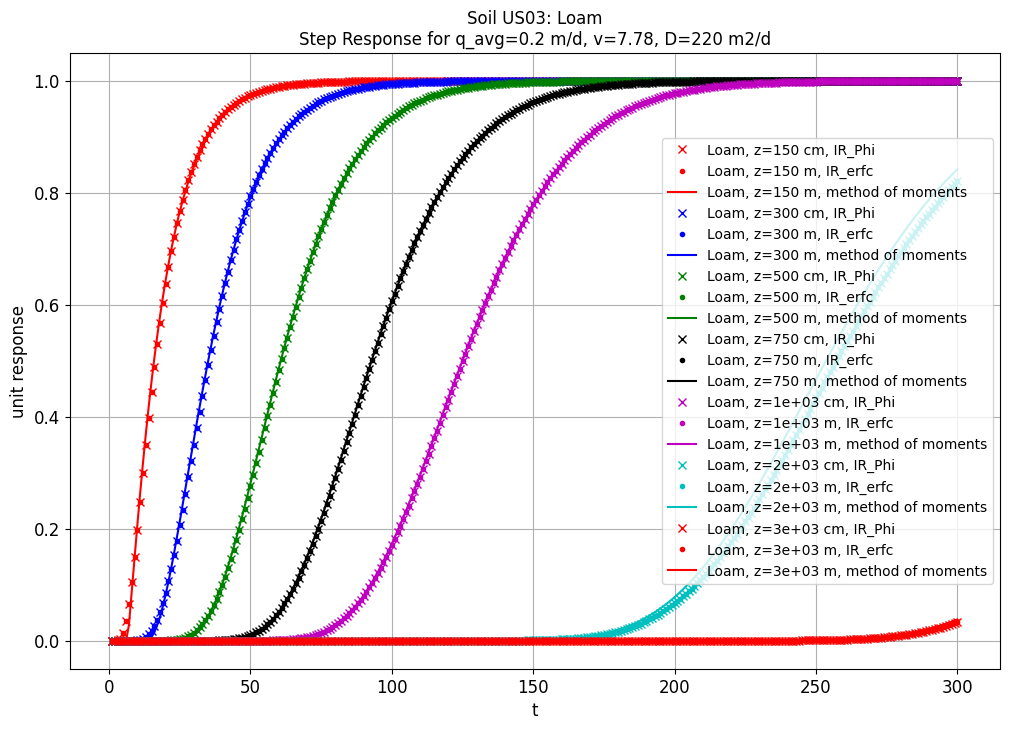

In [15]:
# %% Compute the Step Reponse

q_avg = .2 # cm/d
t = np.linspace(0, 300, 301)[1:]

soil = sUS.Soil("US03")
soil_nm = soil.props['Soil Texture']
ttl = f"Soil {soil.code}: {soil_nm}\n"
title = ttl + f"Step Response for q_avg={q_avg:.3g} m/d, v={v:.3g}, D={D:.3g} m2/d"
ax = etc.newfig(title, 't', 'unit response')

clrs = cycle('rbgkmc')
for z in [150, 300, 500, 750, 1000, 2000, 3000]:
    clr = next(clrs)                                
    ax.plot(t, soil.SR_Phi(z, t, q_avg), 'x', color=clr, label=f'{soil_nm}, z={z:.3g} cm, IR_Phi')
    ax.plot(t, soil.SR_erfc(z, t, q_avg), '.', color=clr, label=f'{soil_nm}, z={z:.3g} m, IR_erfc')
    ax.plot(t, soil.SR_PIII(z, t, q_avg), color=clr, label=f'{soil_nm}, z={z:.3g} m, method of moments')
        
ax.legend(loc='best')
# plt.show()

# BLock resonses ($d\tau = 1$ d) BR_phi, BR_erfc, BR_PIII

* BR_phi is exact solution using cumulative normal distributions
* BR_erfc is exact solution using erfc and exp functions
* BR_PIII is integration of the Pearson III impuls response (method of moments)

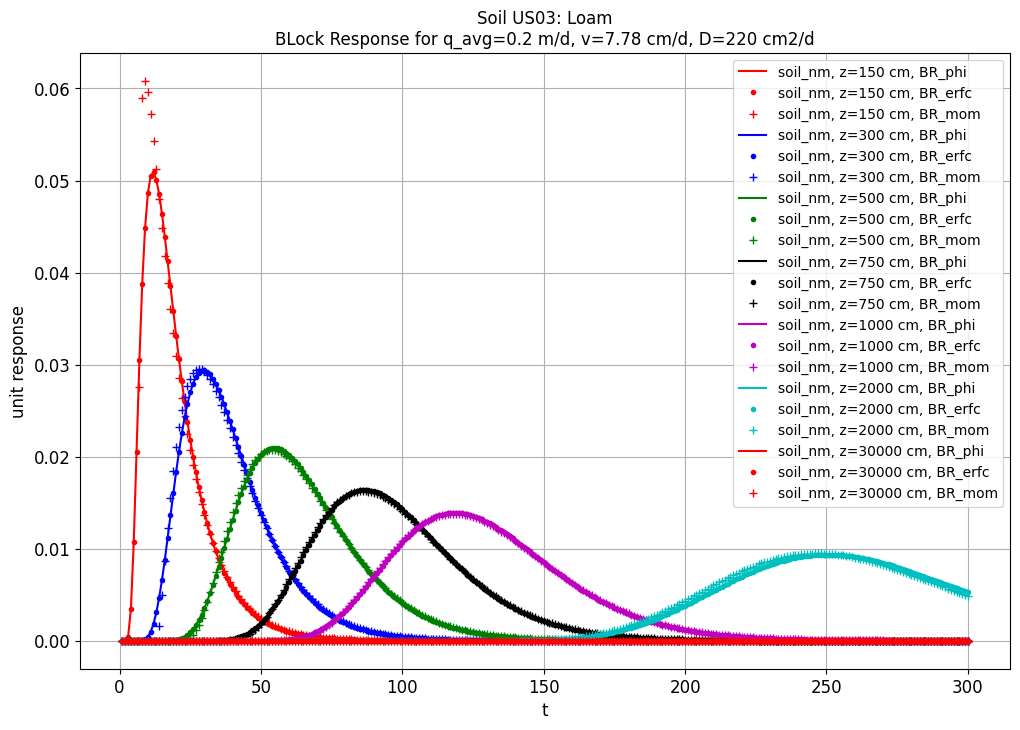

In [16]:
# %% Compute the  Block  Response

q_avg = 0.2 # cm/d
t = np.linspace(0, 300, 301)[1:]

soil = sUS.Soil("US03")  # Sand
soil_nm = soil.props['Soil Texture']
v, D = soil.get_vD(q_avg)
ttl = f"Soil {soil.code}: {soil_nm}\n"
title = ttl + f"BLock Response for q_avg={q_avg:.3g} m/d, v={v:.3g} cm/d, D={D:.3g} cm2/d"
ax = etc.newfig(title, 't', 'unit response')

clrs = cycle('rbgkmc')
for z in [150, 300, 500, 750, 1000, 2000, 30000]:        
    for soil_nm in ['sand']:
        clr = next(clrs)
        ax.plot(t, soil.BR(soil.SR_Phi, z, t, q_avg),  '-', color=clr, label=f'soil_nm, z={z:.0f} cm, BR_phi')
        ax.plot(t, soil.BR(soil.SR_erfc, z, t, q_avg), '.', color=clr, label=f'soil_nm, z={z:.0f} cm, BR_erfc')                         
        ax.plot(t, soil.BR(soil.SR_PIII, z, t, q_avg), '+', color=clr, label=f'soil_nm, z={z:.0f} cm, BR_mom')
        
ax.legend(loc='best')
# plt.show()